# Trabalho da Disciplina de Processamento Digital de Imagens 4.2:

OBJETIVO: O objetivo desta atividade é aplicar as técnicas aprendidas na disciplina de Introdução a PDI no problema de segmentação e contagem automática de objetos. Para isto, serão dadas algumas imagens de entrada, que deverão ser analisadas.

# <font style="color:green">Documentações:</font>

* Numpy: https://numpy.org/doc/stable/
* Matplotlib: https://matplotlib.org/3.5.1/index.html
* Opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html;

##  Letra A:

<b>Objetivo</b>: Analisar a imagem de entrada com o objetivo de aplicar algum pré-processamento para redução de ruído. Utilize livremente as funções existentes na OpenCV.

1. IMPORTANDO BIBLIOTECAS:

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

2. LENDO IMAGENS:

In [6]:
img = cv.imread('test_images/' + 'bolhas.png')[:,:,::-1]
img2 = cv.imread('test_images/' + 'coins-01.png')[:,:,::-1]
img3 = cv.imread('test_images/' + 'rice.png')[:,:,::-1]

3. REMOVENDO O RUÍDO ATRAVÉS DO FILTRO GAUSSIANO (NOTE QUE ALGUMAS IMAGENS TEM KERNEL ESPECÍFICO CONFORME SUA DIMENSÃO, ENQUANTO A IMAGEM 1 NÃO PRECISA DE PRÉ PROCESSAMENTO POIS JÁ SE ENCONTRA LIMIARIZADA):

In [7]:
# LETRA A: REMOVENDO RUÍDO DA IMAGEM PELO FILTRO GAUSSIANO
gray_img = cv.cvtColor(img, cv.COLOR_RGBA2GRAY)

gray_img2 = cv.cvtColor(img2, cv.COLOR_RGBA2GRAY)
gaussianBlur_img2 = cv.GaussianBlur(gray_img2, [7, 7], 0)

gray_img3 = cv.cvtColor(img3, cv.COLOR_RGBA2GRAY)
gaussianBlur_img3 = cv.GaussianBlur(gray_img3, [3, 3], 0)

4. IMPRESSÃO DOS RESULTADOS:

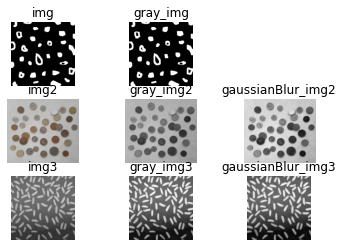

In [8]:
plt.figure('images')

plt.subplot(3, 3, 1), plt.title('img'), plt.axis('OFF'), plt.imshow(img)
plt.subplot(3, 3, 2), plt.title('gray_img'), plt.axis('OFF'), plt.imshow(gray_img, cmap='gray')

plt.subplot(3, 3, 4), plt.title('img2'), plt.axis('OFF'), plt.imshow(img2)
plt.subplot(3, 3, 5), plt.title('gray_img2'), plt.axis('OFF'), plt.imshow(gray_img2, cmap='gray')
plt.subplot(3, 3, 6), plt.title('gaussianBlur_img2'), plt.axis('OFF'), plt.imshow(gaussianBlur_img2, cmap='gray')

plt.subplot(3, 3, 7), plt.title('img3'), plt.axis('OFF'), plt.imshow(img3)
plt.subplot(3, 3, 8), plt.title('gray_img3'), plt.axis('OFF'), plt.imshow(gray_img3, cmap='gray')
plt.subplot(3, 3, 9), plt.title('gaussianBlur_img3'), plt.axis('OFF'), plt.imshow(gaussianBlur_img3, cmap='gray')

plt.show()

## Letra B:

<b>Objetivo:</b> Extrair o conteúdo do fundo removendo-o do processo (usar técnicas de limiarização, extração de bordas e/ou operadores morfológicos para melhorar o  resultado obtido). Utilize livremente as funções existentes na OpenCV. Atente-se ao fato de que, algumas imagens podem não possuir uma uniformidade nas cores do fundo ou terem espaços de cores diferentes. Seu código deverá se adaptar automaticamente, ou ser genérico o suficiente para tratar todos os casos.

<b>Escolha</b>: O algórtimo será genérico para que seja capaz de tratar ambos os exemplos por questões de simplicidade e bons resultados.

Desta forma, criamos uma função chamada remove_background. Essa função será responsável em remover o fundo da imagem de forma
genérica, onde tem-se if's específicos que tratará cada caso. 

1. O primeiro caso foi o mais fácil de tratar pois a imagem já encontrava limiarizada, então foi utilizado apenas o algoritmo floodfill para preencher os buracos;
2. O segundo caso foi o mais complicado pois, foi necessário utilizar o canny para extrair as bordas, com adição de vários operadores morfológicos para que chegue em um resultado favorável;
3. Já o terceiro caso utilizou também o canny, porem, necessitou de menos operações para chegar em um resultado satisfatório.

In [12]:
def remove_background(img,  what_img):
    # CASO PARA A 2A IMAGEM
    if(what_img == 2):
        canny_img = cv.Canny(img, 100, 0)
        
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [7, 7])
        canny_img = cv.morphologyEx(canny_img, cv.MORPH_CLOSE, kernel, iterations=2)
        
        img = canny_img.copy()
    # CASO PARA A 3A IMAGEM
    if(what_img == 3):
        canny_img = cv.Canny(img, 100, 113)
        
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3, 3])
        canny_img = cv.morphologyEx(canny_img, cv.MORPH_CLOSE, kernel, iterations=1)
        
        img = canny_img.copy()
    
    img_floodfill = img.copy()
    height, width = img_floodfill.shape[:2]
    mask = np.zeros((height+2, width+2), np.uint8)
    
    cv.floodFill(img_floodfill, mask, (0, 0), 255)
    
    inverse_floodFill = cv.bitwise_not(img_floodfill)    
    
    # APRIMORAMENTOS E RESULTADO FINAL DOS CASOS
    if(what_img == 1):
        foreground_img = cv.bitwise_or(img, inverse_floodFill)
    if(what_img == 2):
        foreground_img = cv.bitwise_or(img, inverse_floodFill)
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [75, 75])
        foreground_img = cv.morphologyEx(foreground_img, cv.MORPH_OPEN, kernel, iterations=1)
        
        kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3, 3])
        foreground_img = cv.erode(foreground_img, kernel2, iterations=2)
        foreground_img = cv.morphologyEx(foreground_img, cv.MORPH_OPEN, kernel)
    if(what_img == 3):
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3, 3])
        inverse_floodFill = cv.morphologyEx(inverse_floodFill, cv.MORPH_OPEN, kernel, iterations=2)
        inverse_floodFill = cv.dilate(inverse_floodFill, kernel, iterations=1)
       
        foreground_img = inverse_floodFill.copy()
    
    
    plt.subplot(2, 2, 1), plt.title('1'), plt.axis('OFF'), plt.imshow(img, cmap='gray')
    plt.subplot(2, 2, 2), plt.title('2'), plt.axis('OFF'), plt.imshow(img_floodfill, cmap='gray')
    plt.subplot(2, 2, 3), plt.title('3'), plt.axis('OFF'), plt.imshow(inverse_floodFill, cmap='gray')
    plt.subplot(2, 2, 4), plt.title('4'), plt.axis('OFF'), plt.imshow(foreground_img, cmap='gray')

    plt.show()

    return foreground_img

IMPRESSÃO DOS RESULTADOS:
    
1 - Para o primeiro caso, o objetivo no geral foi tampar os buracos para que não haja problemas na hora de fazer a rotulagem.

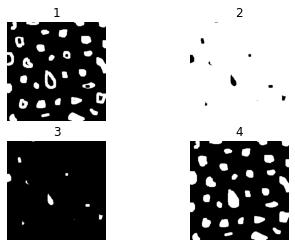

In [13]:
mask_img = remove_background(gray_img, 1)

2 - Já o segundo caso apresentou-se bastante complexo e difícil de remover o fundo. Não era possível realizar de imediato,
um limiar na imagem pois a moeda branca contida na imagem não aparecia. Desta forma foi pensando em realizar ao mesmo tempo
o limiar e o canny da imagem (detectar bordas). Depois utilizar uma sequência de operadores morfológicos.

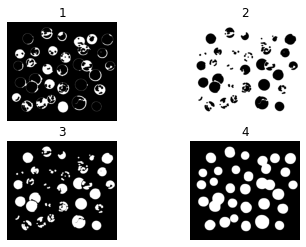

In [14]:
mask_img2 = remove_background(gaussianBlur_img2, 2)
foreground_img2 = cv.bitwise_and(img2, img2, mask=mask_img2)
foreground_img2 = cv.cvtColor(foreground_img2, cv.COLOR_RGBA2BGRA)

3 - O terceiro caso de fato também não foi fácil, porem não chega a ser igual o 2 caso. Basta extrair a borda e em seguida utilizar uma sequência de operadores morfológicos que é menor em comparação com o do caso anterior

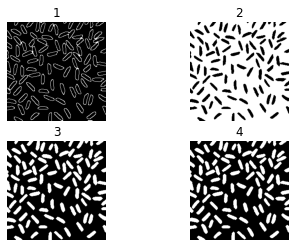

In [16]:
mask_img3 = remove_background(gaussianBlur_img3, 3)
foreground_img3 = cv.bitwise_and(img3, img3, mask=mask_img3)
foreground_img3 = cv.cvtColor(foreground_img3, cv.COLOR_RGBA2BGRA)

## Letra C

<b>Objetivo</b>: Implementar um algoritmo de segmentação baseado na técnica de inundação (usando um algoritmo de busca em largura, por exemplo) para atribuir um número inteiro único a cada objeto conectado presente na imagem (pode-se utilizar vizinhança-4 apenas). Por exemplo, o primeiro objeto fortemente conectado encontrado terá o número 1, o segundo o número 2, e assim por diante.

<b>Escolha:</b> Algorítmo de rotulação de objetos conectados por busca e largura utilizando a vizinhança-4.

Funções:
    
- def is_bound_pixel(img, i, j): Fica responsável em analisar se determinada adjacência dos pixels estão no limite da imagem
(que não se encontra fora do domínio em questão). Nesta função a 3 if's, sendo 2 que retorna  um valor em booleano para falso
quando realmente este pixel vizinho estiver fora e verdaeiro caso ele se encontra dentro da imagem.

In [26]:
# ALGORITMO DE ROTULAGEM DE COMPONENTES CONECTADOS - MÉTODO DE BUSCA POR LARGURA
# - ENTRADA:    IMAGEM LIMIARIZADA;
# - SAIDA:      IMAGEM ROTULADA;

# VERIFICA SE A VIZINHANÇA ESTÁ NO LIMITE
def is_bound_pixel(img, i, j):
    if (i < 0) or (j < 0):
        return False
    if (i > img.shape[0]-1) or (j > img.shape[1]-1):
        return False
    
    return True

- def find_neighbors(img): Encontra  os possíveis vizinhos em 4, armazenando-os em uma fila. Ao final, é
    retornado um vetor contendo os possíveis vizinhos dos pixels analisados em questão.

In [27]:
# ENCONTRA OS POSSIVEIS VIZINHOS DO PIXEL ANALISADO EM QUESTÃO
def find_neighbors(img):
    final_pixel_neighbor = np.zeros((img.shape), dtype=object)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p_up = (i-1, j)
            p_down = (i+1, j)
            p_left = (i, j-1)
            p_right = (i, j+1)
            pixel_neighbor = []

            if is_bound_pixel(img, p_up[0], p_up[1]):
                pixel_neighbor.append((p_up))
            if is_bound_pixel(img, p_down[0], p_down[1]):
                pixel_neighbor.append((p_down))
            if is_bound_pixel(img, p_left[0], p_left[1]):
                pixel_neighbor.append((p_left))
            if is_bound_pixel(img, p_right[0], p_right[1]):
                pixel_neighbor.append((p_right))
                
            final_pixel_neighbor[i, j] = pixel_neighbor
    
    return final_pixel_neighbor

- def labeling_breadthSearch(thresh_img): Basicamente o cérebro do algóritmo. Esta função é responsável em fazer todo o processo
de rotulagem dos objetos da imagem com auxílio das funções descritas anteriormente. Para que a rotulagem seja realizada,
o algoritmo utilizará a estrutura de dados do tipo fila que ficará responsável em armazenar os pixels conecados.

1. Cria uma fila e faz a chamad do método para encontrar a vizinhança 4;

2. Dentro do for aninhado, primeiramente verifica-se dado determinado pixel possui valor 255 (branco), caso obedeça este píxel é rotulado e armazenado na fila;

3. O while agora fica responsável em analisar a vizinhança deste pixel enquanto a fila não for vazia. Primeiramente retiramos
o primeiro elemento da fila o qual a variável q que seria o vizinho recebe este elemento; 

4. Dentro do for, estamos fazendo a busca por possiveis vizinhos deste pixel (determinado objeto com n pixels, e cada pixel desse objeto tem seus vizinhos adjacentes). Desta forma, vamos percorrer cada pixel desse objeto para rotular-los. Caso o valor seja 255, fazs-se a rotulação e insere na fila. Este processo é repetido para tods os pixels vizinhos desse objeto até que no final o while pare de ser executado. É incrmeentado +1 o valor na variável label e este processo é repetido para o próximo objeto da imagem.

In [28]:
def labeling_breadthSearch(thresh_img):
    label_img = thresh_img.copy()
    label = 0
    queue = []
    pixel_neighbor = find_neighbors(label_img)
    
    for i in range(label_img.shape[0]):
        for j in range(label_img.shape[1]):
                            
            p = (i, j)
            if(label_img[p] == 255):
                label += 1
                label_img[p] = label
                queue.append((p))
                
                while queue:
                    q = queue.pop()
                    for q in pixel_neighbor[q]:
                        if(label_img[q] == 255):
                            label_img[q] = label
                            queue.append(q)
                            
    # print(label_img)
    plt.title('label_img'), plt.axis('off'), plt.imshow(label_img, cmap='gray'), plt.show()
    
    return label_img

Leitura e conversão das imagens:

In [29]:
thresh_img =  cv.imread('output_images/bolhas_result.png')
thresh_img2 =  cv.imread('output_images/coins-01_mask.png')
thresh_img3 =  cv.imread('output_images/rice_mask.png')

thresh_img = cv.cvtColor(thresh_img, cv.COLOR_BGR2GRAY)
thresh_img2 = cv.cvtColor(thresh_img2, cv.COLOR_BGR2GRAY)
thresh_img3 = cv.cvtColor(thresh_img3, cv.COLOR_BGR2GRAY)

1. Saída da primeira imagem:

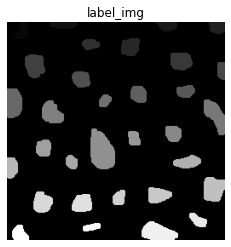

In [30]:
label_img = labeling_breadthSearch(thresh_img)

2. Saída da segunda imagem:

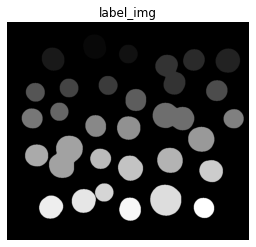

In [31]:
label_img2 = labeling_breadthSearch(thresh_img2)

3. Saída da terceira imagem:

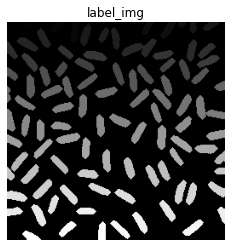

In [32]:
label_img3 = labeling_breadthSearch(thresh_img3)

## Letra E:

<b>Objetivo:</b> Utilizar o histograma da imagem obtida no item 3 para exibir na tela a área em pixels de cada objeto encontrado (exceto o fundo).

Um histograma é gerado através da variável <i>img_ravel</i>. Somente valores a partir do valor 1 é contabilizado, caso
ao contrário, seria contado também os pixels com valor 0. Ao final faz-se a impressão de um array contendo a quantidade
de pixels de cada objeto.

In [33]:
def generate_histogram(img):
    img_ravel = np.ravel(img)
    ir = np.where(img_ravel > 0)
    
    histogram = plt.hist(img_ravel[ir], 256, [0, 256])
    
    arr_pixelsObjects = histogram[0]
    ap = np.where(arr_pixelsObjects > 0)
    
    plt.title('Histogram'), plt.show()
    print("Area of objects in number of pixels:"), print(arr_pixelsObjects[ap])

Saida:

In label_img:



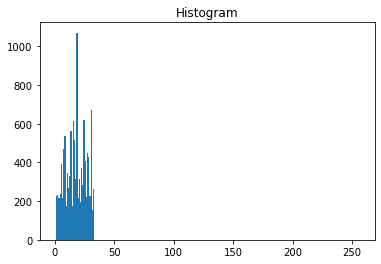

Area of objects in number of pixels:
[ 225.  232.  217.  235.  391.  215.  467.  538.  177.  347.  267.  331.
  561.  175.  613.  516.  315. 1070.  218.  312.  193.  370.  284.  617.
  408.  221.  449.  428.  225.  669.  153.  265.]

In label_img2:



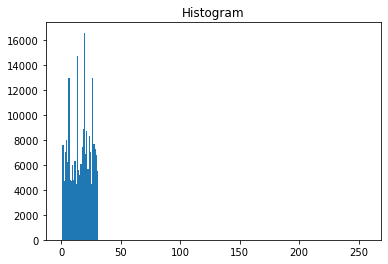

Area of objects in number of pixels:
[ 7604.  4678.  7014.  7948.  6236. 12906.  4810.  4724.  6018.  4760.
  6295.  4448. 14675.  5609.  5192.  6067.  7428.  8842. 16562.  6895.
  8684.  5650.  8276.  7001.  4478. 12963.  7687.  7267.  6764.  5536.]

In label_img3:



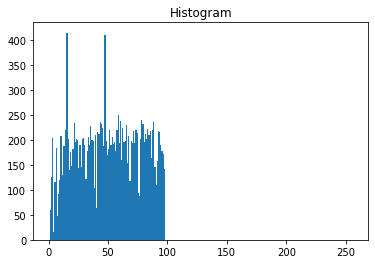

Area of objects in number of pixels:
[ 59. 125. 203.  16. 115. 183.  48.  91. 120. 208. 129. 187. 188. 219.
 414. 201. 140. 176. 147. 182. 233. 196. 202. 199. 143. 190. 146. 201.
 204. 190. 122. 177. 206. 189. 227. 200. 197. 104. 210.  64. 216. 211.
 235. 231. 223. 187. 410. 197. 170. 182. 220. 189. 206. 191. 196. 177.
 220. 250. 194. 237. 159. 224. 196. 198. 229. 153. 208. 117. 198. 193.
 217. 194. 220. 213.  93.  87. 201. 240. 231. 196. 212. 201. 222. 210.
 217. 163. 220. 236. 145. 110. 157. 217. 216. 190. 178. 172. 142.]


(None, None)

In [34]:
print("In label_img:\n"), generate_histogram(label_img)
print("\nIn label_img2:\n"), generate_histogram(label_img2)
print("\nIn label_img3:\n"), generate_histogram(label_img3)